<h>Big Mart Sales Prediction</h>

Train Source: https://www.kaggle.com/devashish0507/big-mart-sales-prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
Train = pd.read_csv("Desktop/New folder/Train.csv", delimiter=',')
Test = pd.read_csv('Desktop/New folder/Test.csv', delimiter=',')

In [3]:
Train.info()
print('-----------------------------------------------------------------------------------------------')
Train.describe(include='all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
---------------------------------------------

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.00,8523,8523.00,8523,8523.00,8523,8523.00,6113,8523,8523,8523.00
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.86,NaN,0.07,NaN,140.99,NaN,1997.83,NaN,NaN,NaN,2181.29
std,NaN,4.64,NaN,0.05,NaN,62.28,NaN,8.37,NaN,NaN,NaN,1706.50
min,NaN,4.56,NaN,0.00,NaN,31.29,NaN,1985.00,NaN,NaN,NaN,33.29
25%,NaN,8.77,NaN,0.03,NaN,93.83,NaN,1987.00,NaN,NaN,NaN,834.25
50%,NaN,12.60,NaN,0.05,NaN,143.01,NaN,1999.00,NaN,NaN,NaN,1794.33
75%,NaN,16.85,NaN,0.09,NaN,185.64,NaN,2004.00,NaN,NaN,NaN,3101.30


In [4]:
Train.head().round(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.10,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


<p>There are 8,523 observations, 11 features and target variable, Outlet sales.</p>

Item weight and outlet size have some missing values. 4 features are numeric, 7 non-numeric and the target variable is also numeric.

Going by item_identifier, Bigmart has a wide variety of products, with the top product appearing only 10 times. Most customers also prefer low fat items, fruits&vegetables and store OUT027.

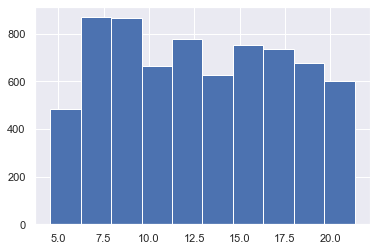

In [5]:
Train['Item_Weight'].hist()
plt.show()

Null values of the Item_Weight feature are filled with mean values of items grouped by Item_Identifier.

In [6]:
s = Train.groupby('Item_Identifier')['Item_Weight'].mean()

missing = Train['Item_Weight'].isnull()
Train.loc[missing,'Item_Weight'] = s[Train.loc[missing, 'Item_Identifier']].values

#Fill any remaining values with mean of items grouped by item type

m = Train.groupby('Item_Type')['Item_Weight'].mean()
missing = Train['Item_Weight'].isnull()
Train.loc[missing,'Item_Weight'] = m[Train.loc[missing, 'Item_Type']].values

In [7]:
Train['Item_Weight'].isnull().any()

False

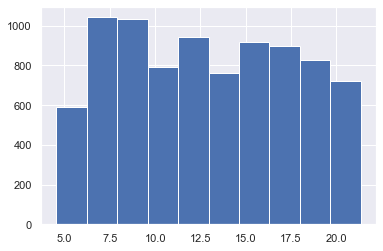

In [8]:
Train['Item_Weight'].hist()
plt.show()

In [9]:
Train[Train['Outlet_Size'].isnull()]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [10]:
Train[Train['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [11]:
Train[Train['Outlet_Type'] == 'Supermarket Type1']['Outlet_Size'].value_counts(normalize=True)

Small     0.499731
High      0.250403
Medium    0.249866
Name: Outlet_Size, dtype: float64

A good number of outlets(2,410) don't have outlet size details. The outlets are of two types, grocery store and supermarket type1, so the missing values are filled accordingly

In [12]:
#Fill outlet size where outlet type is grocery store
Train['Outlet_Size'] = np.where(Train['Outlet_Type']=='Grocery Store', 'Small', Train['Outlet_Size'])


#Fill outlet size of remaining supermarket type1 with values in same ratio
Train['Outlet_Size'] = Train['Outlet_Size'].fillna(pd.Series(np.random.choice(['Medium', 'Small', 'High'], 
                                                      p=[0.25, 0.50, 0.25], size=len(Train))))

In [13]:
#Select all non-numeric columns for further analysis
cols = Train.iloc[:, [2,4,6,8,9,10]]

for i in cols.columns:
    print(pd.value_counts(cols[i]))

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Small     3832
Medium    3264
High      1427
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocer

Item_Fat_Content seems to have, only 2 categories, low fat and regular. So 'low fat' and 'LF' are replaced with 'Low Fat' while 'reg' is replaced with 'regular'. Not sure whether fat content in non-food items really guides a buyers decision, so a third category, 'Non Food' is created for those.

High is replaced with Large in Outlet size, because yes.

In [14]:
Train['Item_Fat_Content'] = Train['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],['Low Fat', 'Low Fat', 'Regular'])
Train['Item_Fat_Content'] = np.where(Train['Item_Type'] =='Household','Non Food', Train['Item_Fat_Content'])
Train['Item_Fat_Content'] = np.where(Train['Item_Type'] =='Health and Hygiene','Non Food', Train['Item_Fat_Content'])
Train['Item_Fat_Content'] = np.where(Train['Item_Type'] =='Others','Non Food', Train['Item_Fat_Content'])
Train['Outlet_Size'] = Train['Outlet_Size'].replace('High', 'Large')

In [15]:
Train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Next we check the distribution of each column values

In [16]:
#Select categorical columns
cols = Train.iloc[:, [2,4,6,8,9,10]]

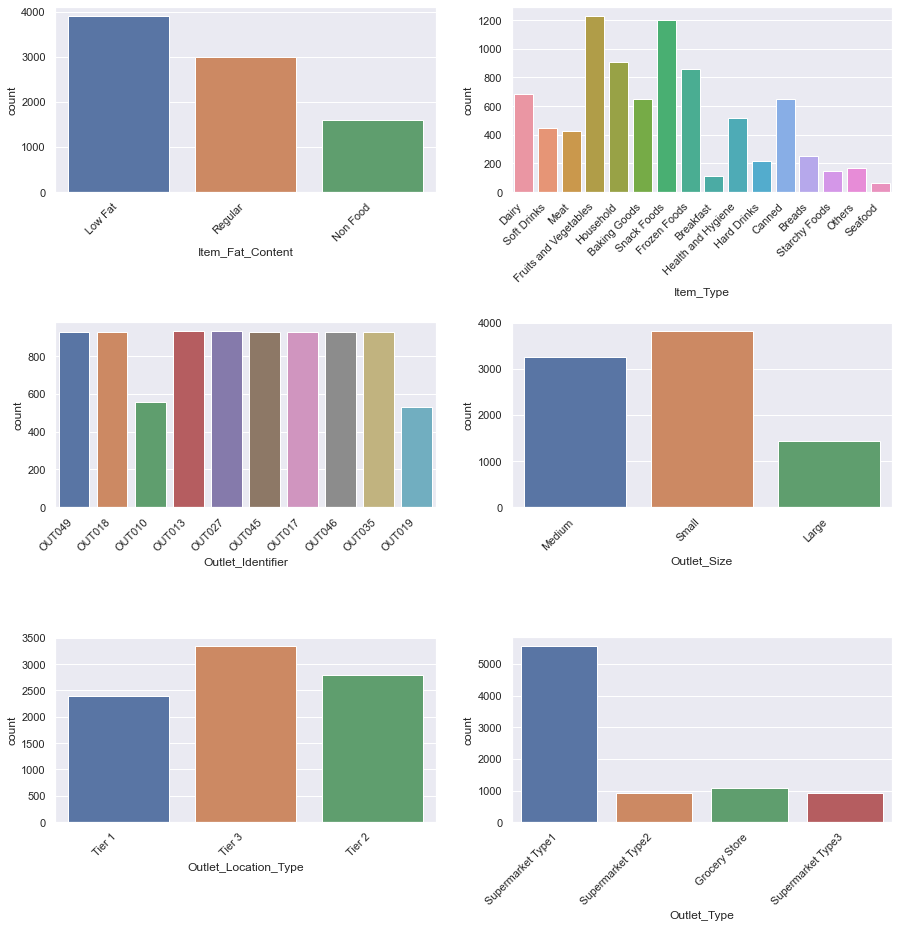

In [17]:
fig, axs = plt.subplots(nrows = 3, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace = .7, wspace=.2)
    
for ax, i in zip(axs.ravel(), cols.columns):
    sns.countplot(x = cols[i], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Low fat is still prefered over regular, but OUT027 is just the most frequent in the Train, but not necesarily the most prefered. Only 2 outlets are not performing at its level.

Fruits & vegetables and snack foods are the top 'sellers' in terms of frequency, maybe because of perishability, or maybe because it's the main business, while sea food has the least fans, maybe coz Bigmart is just not targeting seafood lovers.


In [18]:
#Numeric values
cols1 = Train.iloc[:, [1,3,5,7,11]]

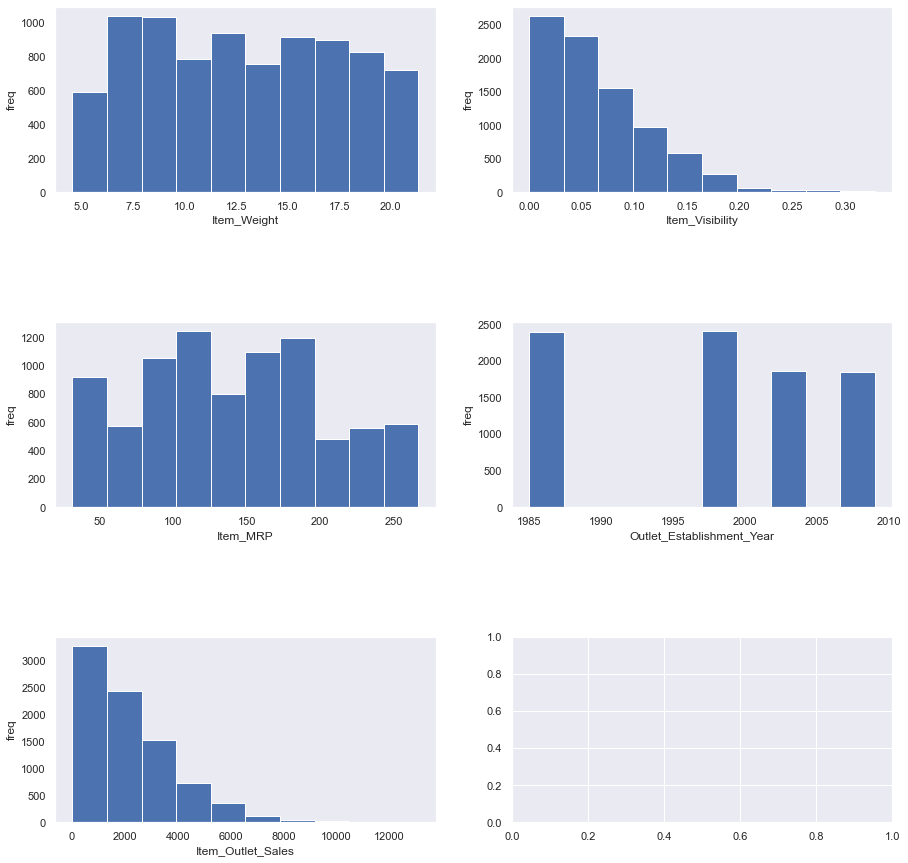

In [19]:
fig, axs = plt.subplots(nrows = 3, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace = .7, wspace=.2)
    
for ax, i in zip(axs.ravel(), cols1.columns):
    cols1[i].hist(bins=10, grid = False, ax=ax)
    ax.set(xlabel=i, ylabel='freq')
plt.show()


Item_Visibility,the % of total display area of all products in a store, allocated to the particular product, has many values that can be rounded to zero,, which indicates that Bigmart sold many small items or items of little display needs.

Most items have a maximum retail price of between 100 and 200

No outlets were opened between 1987 & 1997. Most of the stores were opened at the beginning or immediately after the 10 year break. As part of feature engineering, a column for Outlet age is created, to use instead of establishment year

Most items have a sales value of below 3,000 for every outlet, probably indicating that they don't stock many pricey items.

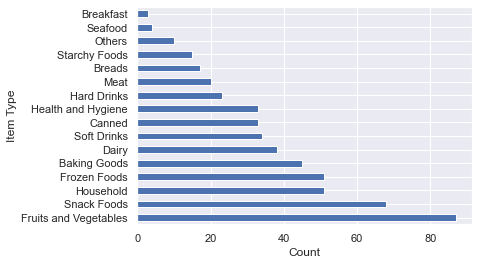

In [20]:
Train[Train['Item_Visibility'].round(2)==0]['Item_Type'].value_counts().plot(kind='barh')
plt.xlabel(xlabel='Count')
plt.ylabel(ylabel='Item Type')

plt.show()

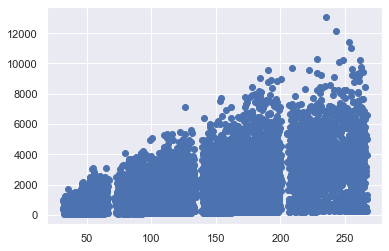

In [21]:
plt.scatter(Train['Item_MRP'],Train['Item_Outlet_Sales'])
plt.show()

Items seem to have 4 distinct price groups, and a column is created to reflect that. The groups will be Low, Medium, High, Very High

<h1> FEATURE ENGINEERING </h1>

There are 16 different categories for Item_Type which are in similar broader cartegories, so the categories are reduced to 4: Foods, Drinks, Non_foods and Others

Year of establishment is replaced by age (2013 is the year the dataset relates to).
Item_Price_Group is created from Item_MRP.
Categorical features are encoded to numbers (Ordinal: Item_Fat_Content, Outlet_Size, Outlet_Location_Type, Outlet_Type. Nominal: Item_Type, Outlet_Identifier, Item_Identifier)

In [22]:
Train['Item_Type'] = Train['Item_Type'].replace(['Fruits and Vegetables', 'Snack Foods',
                                                     'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods',
                                                     'Meat', 'Breads', 'Starchy Foods', 'Breakfast', 'Seafood'],
                                                     'Foods')
Train['Item_Type'] = Train['Item_Type'].replace(['Household', 'Health and Hygiene'],
                                                     'Non Foods')
Train['Item_Type'] = Train['Item_Type'].replace(['Soft Drinks', 'Hard Drinks'],
                                                     'Drinks')
Train['Item_Outlet_Qty'] = (Train['Item_Outlet_Sales']/Train['Item_MRP']).round()

In [23]:
Train['Outlet_Age'] = 2013 -  Train['Outlet_Establishment_Year']
Train = Train.drop('Outlet_Establishment_Year', axis=1)

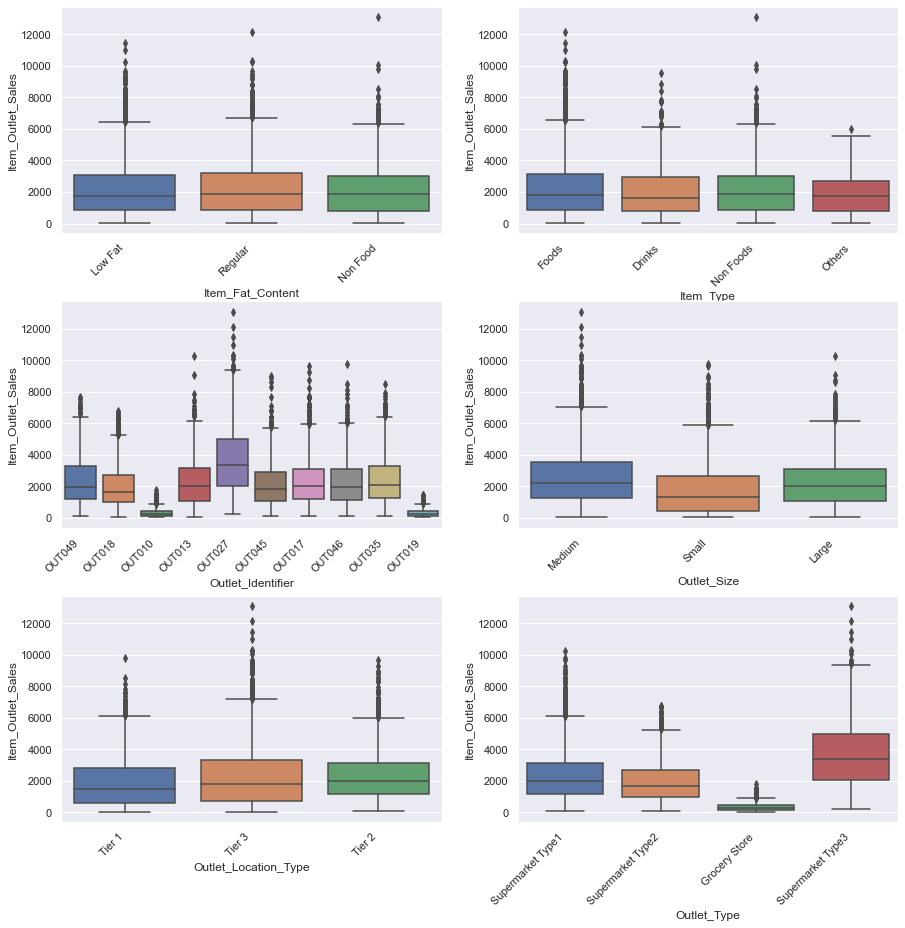

In [24]:
#Boxplots of features vs target

fig, axes = plt.subplots( nrows = 3, ncols = 2, figsize = (15,15))
fig.subplots_adjust(hspace = .3, wspace=.2)

for ax, i in zip(axes.ravel(), list(list(Train.columns)[i] for i in [2,4,6,7,8,9])):
    sns.boxplot(x=i, y='Item_Outlet_Sales', data=Train, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

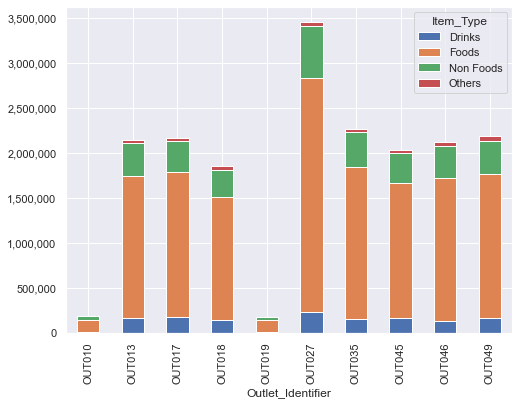

In [25]:
Item_Type_Outlet = Train.groupby(['Outlet_Identifier','Item_Type'])['Item_Outlet_Sales'].sum().round(2)
Item_Type_Outlet.unstack().plot(kind='bar', stacked=True, figsize=(8,6))
plt.ticklabel_format(axis="y", style='plain')
ax = plt.gca()
fmt = "{x:,.0f}"
tick = mpl.ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.show()

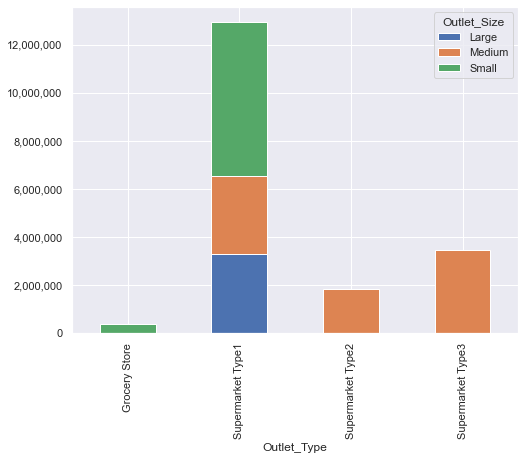

In [26]:
Outlet_Type_Size = Train.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].sum().round(2)
Outlet_Type_Size.unstack().plot(kind='bar', stacked=True, figsize=(8,6))
plt.ticklabel_format(axis="y", style='plain')
ax = plt.gca()
fmt = "{x:,.0f}"
tick = mpl.ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.show()

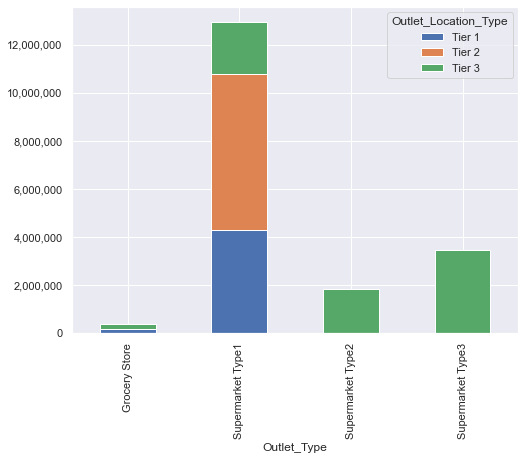

In [27]:
Outlet_Type_Location = Train.groupby(['Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].sum().round(2)
Outlet_Type_Location.unstack().plot(kind='bar', stacked=True, figsize=(8,6))
plt.ticklabel_format(axis="y", style='plain')
ax = plt.gca()
fmt = "{x:,.0f}"
tick = mpl.ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.show()

In [28]:
Train.groupby(['Outlet_Age', 'Outlet_Identifier'])['Outlet_Identifier'].nunique()

Outlet_Age  Outlet_Identifier
4           OUT018               1
6           OUT017               1
9           OUT035               1
11          OUT045               1
14          OUT049               1
15          OUT010               1
16          OUT046               1
26          OUT013               1
28          OUT019               1
            OUT027               1
Name: Outlet_Identifier, dtype: int64

In [29]:
Train['Item_MRP']=np.select([Train['Item_MRP']<75, Train['Item_MRP'].between(75,150),
                                     Train['Item_MRP'].between(150, 200)],['Low','Medium', 'High'],'Very High')

encoder= ce.OrdinalEncoder(cols=['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Outlet_Type',
                                'Item_MRP'], return_df=True,
                           mapping=[{'col':'Outlet_Size', 'mapping':{'Small':0,'Medium':1,'Large':2}},
                                    {'col':'Outlet_Location_Type', 'mapping' :{'Tier 1':0, 'Tier 2':1, 'Tier 3':2}},
                                    {'col':'Item_Fat_Content', 'mapping' :{'Non Food':0, 'Low Fat':1, 'Regular':2}},
                                    {'col':'Outlet_Type', 'mapping' :{'Grocery Store':0, 'Supermarket Type1':1,
                                                                      'Supermarket Type2':2, 'Supermarket Type3':3}},
                                    {'col': 'Item_MRP', 'mapping' :{'Low':0, 'Medium':1, 'High':2, 'Very High':3}}])



Train = encoder.fit_transform(Train)

In [30]:
encoder=ce.OneHotEncoder(cols='Item_Type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
Train = encoder.fit_transform(Train)

encoder = ce.count.CountEncoder(cols=['Item_Identifier'])
Train = encoder.fit_transform(Train)

encoder= ce.BaseNEncoder(cols=['Outlet_Identifier'],base=5, drop_invariant=True)
Train = encoder.fit_transform(Train)

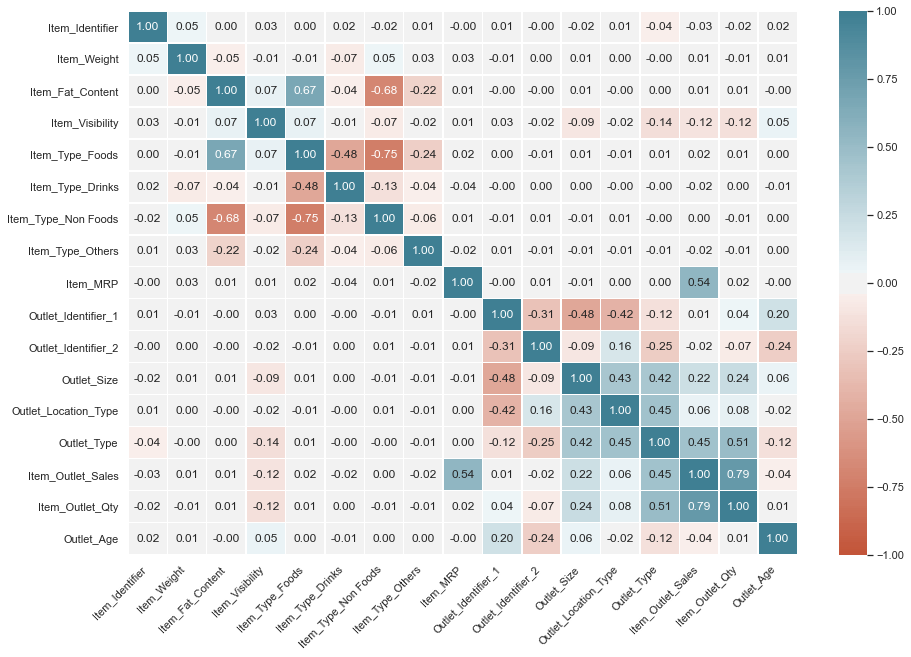

In [31]:

corrMatrix = (Train.corr(method= 'spearman'))

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True, fmt='.2f', center=0, cmap=sns.diverging_palette(20, 220, n=200),
                 linewidths=0.5)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




<h1>Linear Regression</h1>

In [32]:
X = Train.drop('Item_Outlet_Sales', axis=1)
Y = Train['Item_Outlet_Sales']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2021)

model = LinearRegression()
model.fit(X_train, Y_train)
Y_predicted = model.predict(X_test)

In [34]:
LR_MSE = mean_squared_error(Y_test, Y_predicted, squared = False)
LR_Score = model.score(X_test, Y_test)

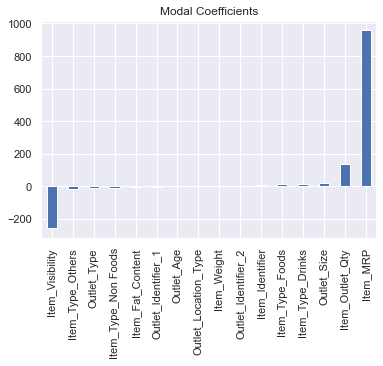

In [35]:
coef = pd.Series(model.coef_,X_train.columns).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')
plt.show()

<h1>Elastic Net Regression</h1>

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2021)

model = ElasticNet(alpha=0.01, l1_ratio=0.1, normalize=False)

model.fit(X_train,Y_train)

Y_predicted = model.predict(X_test)

In [37]:
ENR_MSE = mean_squared_error(Y_test, Y_predicted, squared = False)
ENR_Score = model.score(X_test, Y_test)

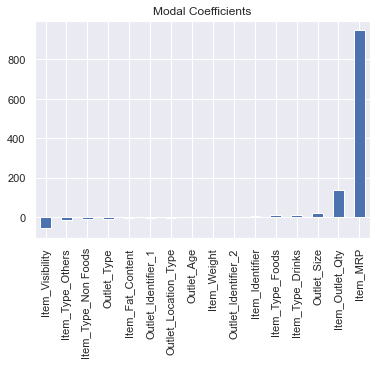

In [38]:
coef = pd.Series(model.coef_,X_train.columns).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')
plt.show()

<h1>KNeighbours Regression</h1>

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2021)

norm = MinMaxScaler(feature_range=(0, 1))

normX = norm.fit(X_train)
X_train = normX.transform(X_train)
X_test = normX.transform(X_test)

In [40]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 4}

In [41]:
model = KNeighborsRegressor(n_neighbors = 4)

model.fit(X_train, Y_train)
Y_predicted = model.predict(X_test)
KNN_MSE = mean_squared_error(Y_test, Y_predicted, squared = False)
KNN_Score = model.score(X_test, Y_test)

<h1>SVR</h1>

In [42]:
params = {'kernel':['rbf', 'poly', 'linear', 'sigmoid']}

model = SVR()

model = GridSearchCV(model, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'kernel': 'poly'}

In [43]:
model = SVR(kernel='poly')

model.fit(X_train,Y_train)

Y_predicted = model.predict(X_test)
SVR_MSE = mean_squared_error(Y_test, Y_predicted, squared = False)
SVR_Score = model.score(X_test, Y_test)

<h1>Decision Tree Regressor</h1>

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2021)

dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, Y_train)
Y_predicted = dtree.predict(X_test)
DTR_MSE = mean_squared_error(Y_test, Y_predicted, squared = False)
DTR_Score = dtree.score(X_test, Y_test)

<h1>Random Forest</h1>

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2021)

model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)

model_rf.fit(X_train, Y_train) 
Y_predicted = model_rf.predict(X_test)
RF_MSE = mean_squared_error(Y_test, Y_predicted, squared = False)
RF_Score = model_rf.score(X_test, Y_test)

<h1>Comparison</h1>

In [46]:
Model_Performance = pd.DataFrame({'Model': ['Linear', 'Elastic Net', 'KNN', 'SVR', 'Decision Tree', 'Random Forest'],
                                 'MSE' : [LR_MSE, ENR_MSE, KNN_MSE, SVR_MSE, DTR_MSE, RF_MSE],
                                 'R2 Score' : [LR_Score, ENR_Score, KNN_Score, SVR_Score, DTR_Score, RF_Score]})
Model_Performance.round(2).sort_values(by='R2 Score', ascending=False)

,Model,MSE,R2 Score
5,Random Forest,325.09,0.96
0,Linear,618.13,0.87
1,Elastic Net,618.50,0.87
2,KNN,795.74,0.79
4,Decision Tree,905.28,0.73
3,SVR,1095.86,0.60


<h1>Submission file</h1>

In [47]:
Test.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,FDP15,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


In [48]:
s = Test.groupby('Item_Identifier')['Item_Weight'].mean()

missing = Test['Item_Weight'].isnull()
Test.loc[missing,'Item_Weight'] = s[Test.loc[missing, 'Item_Identifier']].values

#Fill any remaining values with mean of items grouped by item type

m = Test.groupby('Item_Type')['Item_Weight'].mean()
missing = Test['Item_Weight'].isnull()
Test.loc[missing,'Item_Weight'] = m[Test.loc[missing, 'Item_Type']].values

In [49]:
Test['Item_Weight'].isnull().any()

False

In [50]:
Test[Test['Outlet_Size'].isnull()]['Outlet_Type'].value_counts()

Supermarket Type1    1236
Grocery Store         370
Name: Outlet_Type, dtype: int64

In [51]:
Test[Test['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].value_counts()

Small    352
Name: Outlet_Size, dtype: int64

In [52]:
Test[Test['Outlet_Type'] == 'Supermarket Type1']['Outlet_Size'].value_counts(normalize=True)

Small     0.499798
High      0.250302
Medium    0.249899
Name: Outlet_Size, dtype: float64

In [53]:
#Fill outlet size where outlet type is grocery store
Test['Outlet_Size'] = np.where(Test['Outlet_Type']=='Grocery Store', 'Small', Test['Outlet_Size'])


#Fill outlet size of remaining supermarket type1 with values in same ratio
Test['Outlet_Size'] = Test['Outlet_Size'].fillna(pd.Series(np.random.choice(['Medium', 'Small', 'High'], 
                                                      p=[0.25, 0.50, 0.25], size=len(Test))))

In [54]:
Test['Item_Fat_Content'] = Test['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],['Low Fat', 'Low Fat', 'Regular'])
Test['Item_Fat_Content'] = np.where(Test['Item_Type'] =='Household','Non Food', Test['Item_Fat_Content'])
Test['Item_Fat_Content'] = np.where(Test['Item_Type'] =='Health and Hygiene','Non Food', Test['Item_Fat_Content'])
Test['Item_Fat_Content'] = np.where(Test['Item_Type'] =='Others','Non Food', Test['Item_Fat_Content'])
Test['Outlet_Size'] = Test['Outlet_Size'].replace('High', 'Large')
Test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [55]:
Test['Item_Type'] = Test['Item_Type'].replace(['Fruits and Vegetables', 'Snack Foods',
                                                     'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods',
                                                     'Meat', 'Breads', 'Starchy Foods', 'Breakfast', 'Seafood'],
                                                     'Foods')
Test['Item_Type'] = Test['Item_Type'].replace(['Household', 'Health and Hygiene'],
                                                     'Non Foods')
Test['Item_Type'] = Test['Item_Type'].replace(['Soft Drinks', 'Hard Drinks'],
                                                     'Drinks')

In [56]:
Test['Outlet_Age'] = 2013 -  Test['Outlet_Establishment_Year']
Test['Item_MRP']=np.select([Test['Item_MRP']<75, Test['Item_MRP'].between(75,150),
                                     Test['Item_MRP'].between(150, 200)],['Low','Medium', 'High'],'Very High')
Test = Test.drop('Outlet_Establishment_Year', axis=1)

In [57]:
encoder= ce.OrdinalEncoder(cols=['Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content', 'Outlet_Type',
                                 'Item_Price_Group'], return_df=True,
                           mapping=[{'col':'Outlet_Size', 'mapping':{'Small':0,'Medium':1,'Large':2}},
                                    {'col':'Outlet_Location_Type', 'mapping' :{'Tier 1':0, 'Tier 2':1, 'Tier 3':2}},
                                    {'col':'Item_Fat_Content', 'mapping' :{'Non Food':0, 'Low Fat':1, 'Regular':2}},
                                    {'col':'Outlet_Type', 'mapping' :{'Grocery Store':0, 'Supermarket Type1':1,
                                                                      'Supermarket Type2':2, 'Supermarket Type3':3}},
                                    {'col': 'Item_MRP', 'mapping' :{'Low':0, 'Medium':1, 'High':2, 'Very High':3}}])

Test1 = encoder.fit_transform(Test)

In [58]:
encoder=ce.OneHotEncoder(cols='Item_Type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
Test1 = encoder.fit_transform(Test1)

In [59]:
encoder = ce.count.CountEncoder(cols=['Item_Identifier'])
Test1 = encoder.fit_transform(Test1)

encoder= ce.BaseNEncoder(cols=['Outlet_Identifier'],base=5, drop_invariant=True)
Test1 = encoder.fit_transform(Test1)

In [60]:
Train1 = Train.groupby(['Item_Identifier', 'Outlet_Type', 'Outlet_Size'], as_index=False)['Item_Outlet_Qty'].mean()

cols = ['Item_Identifier', 'Outlet_Type', 'Item_Outlet_Qty', 'Outlet_Size']
Test1 = Test1.merge(Train1[cols], on=['Item_Identifier', 'Outlet_Type', 'Outlet_Size'], how='left')
Test1['Item_Outlet_Qty'] = Test1['Item_Outlet_Qty'].fillna(Test1['Item_Outlet_Qty'].mean()).round()

In [61]:
Y_predicted = model_rf.predict(Test1)

In [62]:
submission = pd.DataFrame({'Item_Identifier' : list(Test['Item_Identifier']),
                           'Outlet_Identifier' : list(Test['Outlet_Identifier']),
                           'Item_Outlet_Sales' : list(Y_predicted)}).to_csv(r'C:\Users\hp\Desktop\Bigmart.csv',
                                                                            index = True, header=True)